In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#laoding the dataset

wine_dataset = pd.read_csv('/WineQuality_dataset.csv')


In [3]:
wine_dataset.shape


(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#checking for missing values

wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
#Data Analysis and Visualisation

wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


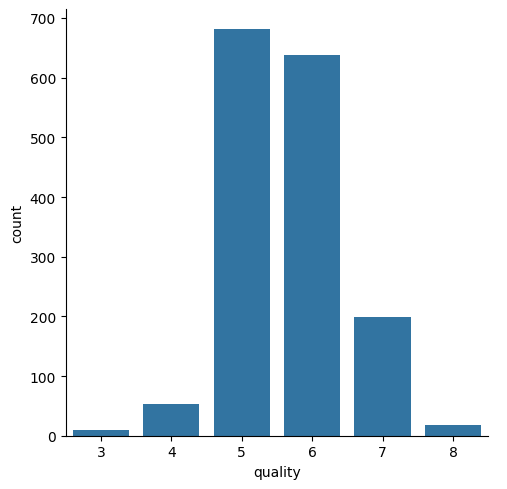

In [8]:
#number of values for each quality

sns.catplot(x='quality', kind='count', data = wine_dataset)

<Axes: xlabel='quality', ylabel='volatile acidity'>

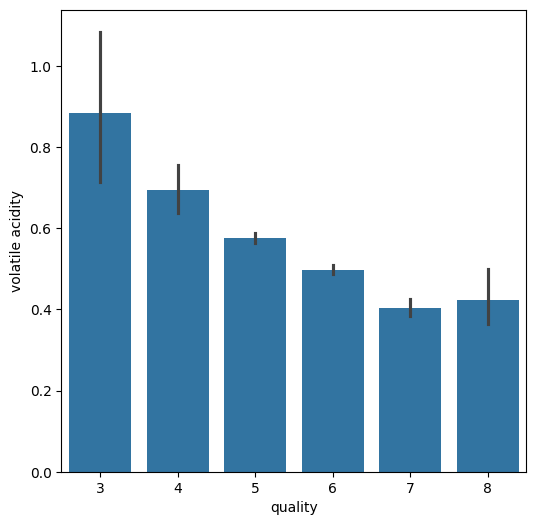

In [9]:
#Volatile acidity vs Quality

plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

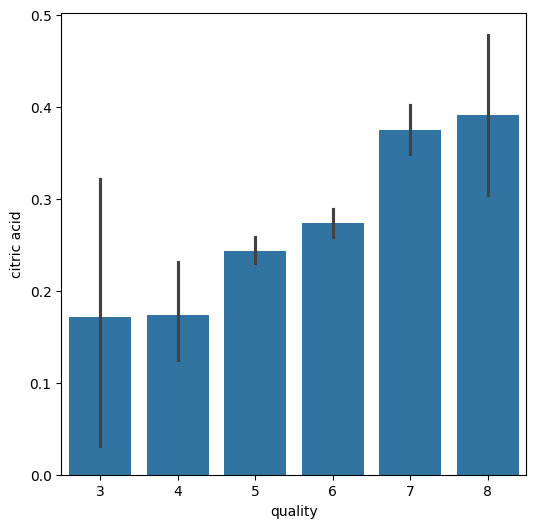

In [10]:
#Citric acid vs Qulaity
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

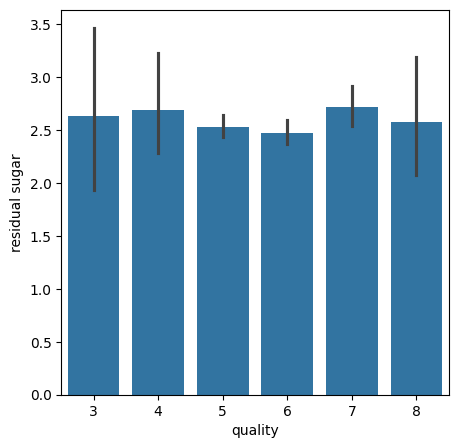

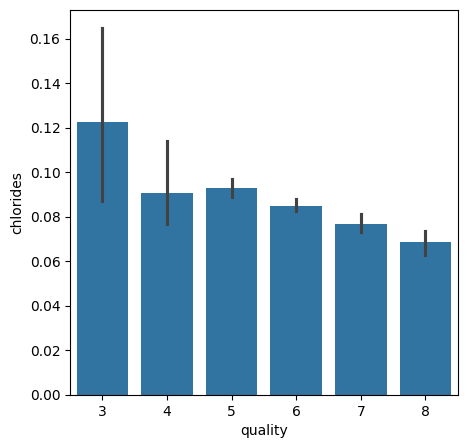

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)

In [13]:
#Correlation between the datas

correlation = wine_dataset.corr()

<Axes: >

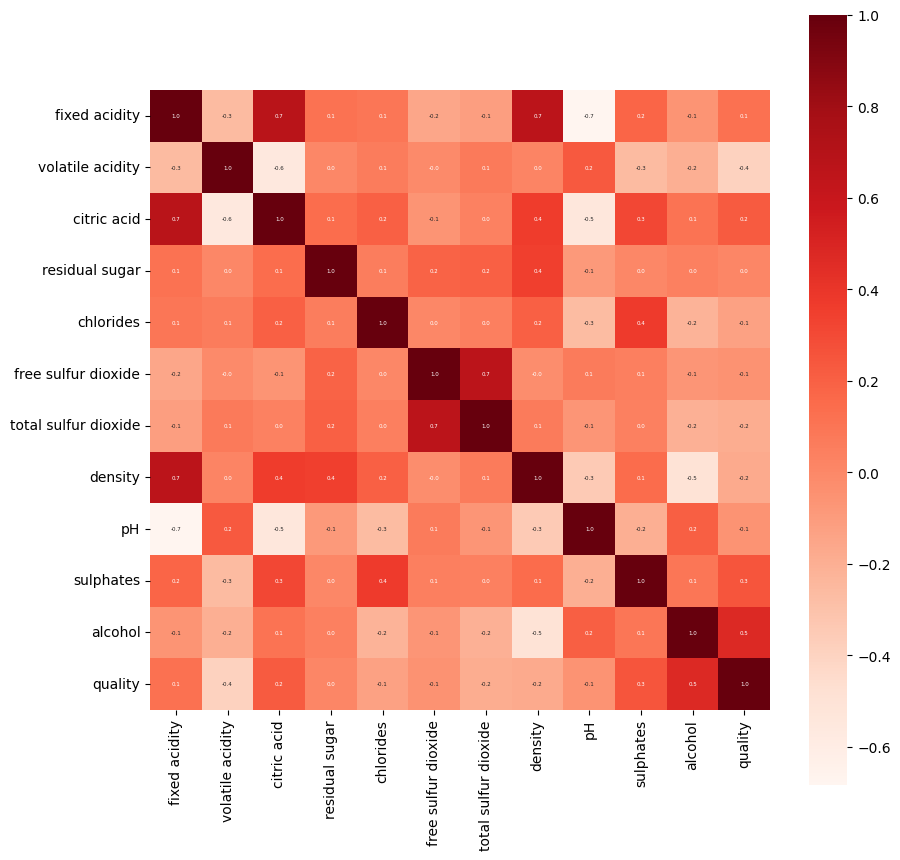

In [15]:
#Constructing heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':4}, cmap='Reds')

In [17]:
#Seperating data and labels

X = wine_dataset.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [18]:
#Label Binarization

Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [19]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [24]:
#Splitting into Training and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=3)

In [26]:
X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1599, 11), (1439, 11), (160, 11), (1439,), (160,))

In [27]:
#Model Training

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
#Accuracy scores

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy on Test data :  0.93125


In [32]:
#Building a predictor system

input_data = (7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if(prediction[0]==1):
    print('Wine Quality is good.')
else:
    print('Wine Quality is bad.')


Wine Quality is bad.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
